In [8]:
from pathlib import Path

import numpy as np
from skimage import io

from corebreakout import defaults
from corebreakout import CoreSegmenter

## Set Defaults

In [9]:
MODEL_DIR = defaults.MODEL_DIR
MODEL_PATH = defaults.CB_MODEL_PATH

IMAGES_PATH = Path('../tests/data/two_image_dataset/')

## Construct `CoreSegmenter`

In [10]:
# Showing default kwargs:
segmenter = CoreSegmenter(
    MODEL_DIR,
    MODEL_PATH,
    model_config = defaults.DefaultConfig(),
    class_names  = defaults.CLASSES,
    layout_params= defaults.LAYOUT_PARAMS 
)

Building MRCNN model from directory: /home/ross/code/python/projects/corebreakout/assets/models
Loading model weights from file: /home/ross/code/python/projects/corebreakout/assets/models/mask_rcnn_cb_default.h5


## Set images

**NOTE**: the `img`s passed to `segment()` or `segment_all()` can be paths to images, or `numpy` arrays. We're just using paths here because it's one less step, but either way works the exact same.

In [13]:
imgs = list(IMAGES_PATH.glob('*.jpeg'))
imgs

[PosixPath('../tests/data/two_image_dataset/S00111582.jpeg'),
 PosixPath('../tests/data/two_image_dataset/S00101409.jpeg')]

## `segment()` single images

Reading file: ../tests/data/two_image_dataset/S00111582.jpeg
(1.0, 2.0)  +  (2.0, 3.0)  gap:  0.0


(<Figure size 1080x3600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faaf1e64890>)

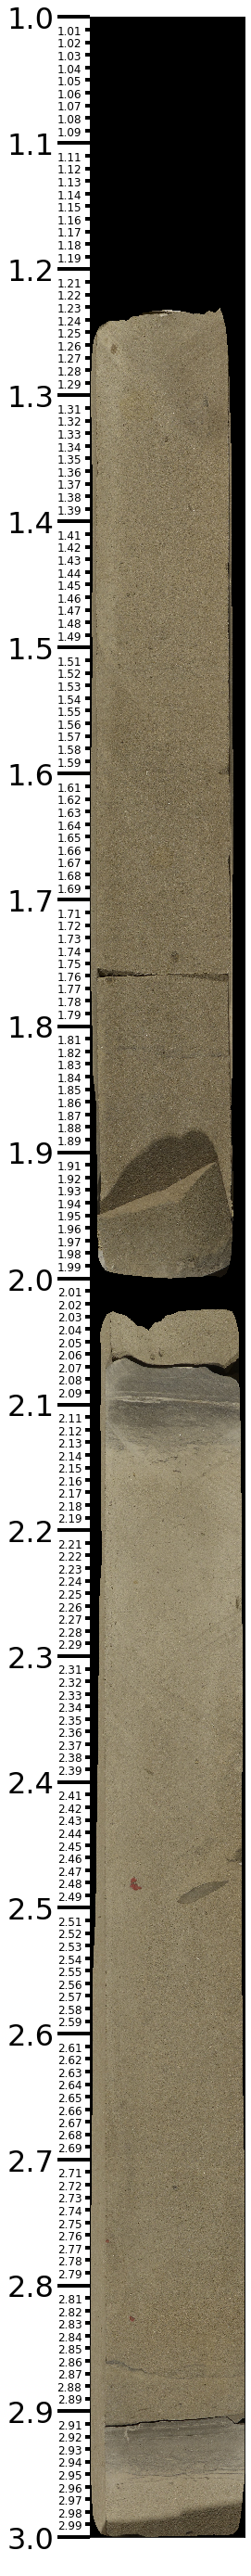

In [14]:
# Giving a "dummy" depth_range to cover two columns per image
column1 = segmenter.segment(imgs[0], (1.0, 3.0))
column1.plot()

## `segment_all()` pairs of images and depth_ranges

Reading file: ../tests/data/two_image_dataset/S00111582.jpeg
(1.0, 2.0)  +  (2.0, 3.0)  gap:  0.0
Reading file: ../tests/data/two_image_dataset/S00101409.jpeg
(3.0, 4.0)  +  (4.0, 5.0)  gap:  0.0
(1.0, 3.0)  +  (3.0, 5.0)  gap:  0.0


(<Figure size 1080x3600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faaef35b290>)

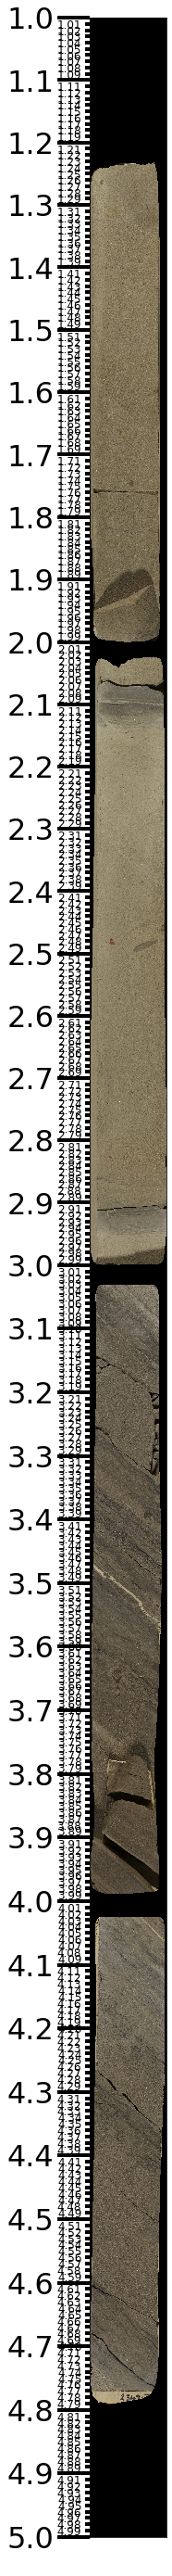

In [15]:
depth_ranges = [(1., 3.), (3., 5.)]

combined_column = segmenter.segment_all(imgs, depth_ranges)

combined_column.plot()